# Chapter #4: Selecting the Best Model with Hyperparameter Tuning

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, make_scorer

## 1. Introduction to hyperparameter tuning

1. Introduction to hyperparameter tuning
> Hello again - In this lesson, we are going to start applying the model validation techniques we have been practicing while introducing hyperparameter tuning.

2. Model parameters
> To start, let's first review what model parameters are, as model parameters and model hyperparameters are quite different. Model parameters are created as the result of fitting a model and are estimated by the input data. They are used to make predictions on new data and are not manually set by the modeler.

3. Linear regression parameters
> For example, in a linear model, the coefficients and intercept are considered model parameters. We can print a linear model's parameters using lr-dot-coef_ and lr-dot-intercept_. Notice that these parameters are only created after the model has been fit.

4. Linear regression parameters
> If we did not call .fit, the coefficients and intercept would not exist for the lr object.

5. Model hyperparameters
> So, if model parameters are the result of training a model, then what are hyperparameters? Hyperparameters are the values that are set before training occurs. So anytime we refer to a parameter as being manually set, we are referring to hyperparameters. We have already been working with some hyperparameters for scikit-learn's random forest models, such as n_estimators, and max_depth. Let's cover a few more of the basic hyperparameters for these models.

6. Random forest hyperparameters
> The table above only has four of the 15 or so possible hyperparameters, and we have already discussed the first three: n_estimators, max_depth, and max_features during this course. I am adding min_samples_split to our list, which is the minimum number of samples required to make a split at the end of a leaf. If a leaf in a decision tree has four observations in it, min_samples_split must be 4 or greater in order for this leaf to be split into more leaves. So what now? If these are hyperparameters, how do we tune them?

7. What is hyperparameter tuning?
> Throughout this course, we have been hinting at various aspects of hyperparameter tuning. We have used various hyperparameters and altered the values of these hyperparameters to suit our specific model or data. Hyperparameter tuning consists of selecting hyperparameters to test and then running a specific type of model with various values for these hyperparameters. For each run of the model, we keep track of how well the model did for a specified accuracy metric, as well as keep track of the hyperparameters that were used.

8. Specifying ranges
> One of the hardest parts of this process is selecting the right hyperparameters to tune, and specifying the appropriate value ranges for each hyperparameter. For example, consider the three ranges of values specified in the example above. When we run hyperparameter tuning, we run our random forest model at different values from the ranges specified. We might select a random max depth, a minimum sample for creating splits of 8, and a maximum feature count of 4. We used the random-dot-choice() function to select randomly from the depth list. To review which parameters were used at any time, you can use the get_params() method on your model.

9. Too many hyperparameters!
> If you do check out the contents of get_params(), you might feel overwhelmed by the amount of options available. For this model, there are 16 different hyperparameters. In practice, however, only a handful of these hyperparameters will be tuned at the same time. Tuning too many can take forever to train and might make reading the output difficult.

10. General guidelines
> It's best to start with the basics and tune the hyperparameters you understand. Read through the documentation for the ones that you don't, and test values you have seen in other models. As you practice this technique more, you will become more comfortable with the process.

11. Let's practice!
> Let's work on the basic steps for hyperparameter tuning.

### 1.1. Creating Hyperparameters

For a school assignment, your professor has asked your class to create a random forest model to predict the average test score for the final exam.

After developing an initial random forest model, you are unsatisfied with the overall accuracy. You realize that there are too many hyperparameters to choose from, and each one has a lot of possible values. You have decided to make a list of possible ranges for the hyperparameters you might use in your next model.

Your professor has provided de-identified data for the last ten quizzes to act as the training data. There are 30 students in your class.

- Getting everything ready.

In [2]:
# Initiating the model:
rfr = RandomForestRegressor(random_state=1111)

- Print `.get_params()` in the console to review the possible parameters of the model that you can tune.

In [3]:
# Printing the model parameters:
print(rfr.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1111, 'verbose': 0, 'warm_start': False}


- Create a maximum depth list, `[4, 8, 12]` and a minimum samples list `[2, 5, 10]` that specify possible values for each hyperparameter.

In [4]:
# Creating a list for possible values of max_depth & min_samples_split:
max_depth = [4, 8, 12]
min_samples_split = [2, 5, 10]

- Create one final list to use for the maximum features.
> Use values 4 through the maximum number of features possible (10), by 2.

In [5]:
# Creating a list for possible values of max_features:
max_features = [4, 6, 8, 10]

### 1.2. Running a model using ranges

You have just finished creating a list of hyperparameters and ranges to use when tuning a predictive model for an assignment. You have used `max_depth`, `min_samples_split`, and `max_features` as your range variable names.

- Randomly select a max_depth, min_samples_split, and max_features using your range variables.

In [6]:
# Setting the default randon number generator:
randn_gen = np.random.default_rng(1111)

In [7]:
# Setting somerandom values for the hyperparameters in question:
rfr = RandomForestRegressor(n_estimators=100,
                            max_depth=randn_gen.choice(max_depth),
                            min_samples_split=randn_gen.choice(min_samples_split),
                            max_features=randn_gen.choice(max_features))

- Print out all of the parameters for rfr to see which values were randomly selected.

In [8]:
# Printing the model parameters:
print(rfr.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 12, 'max_features': 10, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


## 2. RandomizedSearchCV

1. RandomizedSearchCV
> Now that we have discussed the basics of hyperparameter tuning let's combine model validation with tuning to start creating the most accurate, validated models possible.

2. Grid searching hyperparameters
> Consider if we only had two parameters to choose from, the number of trees and the maximum depth. If we had five options for the number of trees and four options for the maximum depth, this would create 20 possible combinations of these parameters. Notice that they form a grid of possible parameters. We could conduct a complete grid search, and run our random forest model using each unique combination of the two hyperparameters.

3. Grid searching continued
> There is one main benefit for grid searching, which is that each possible combination of values will be tested. However, there is one major drawback: any additional parameter added for testing will grow the training time exponentially. Therefore grid searching is only possible with a limited number of parameters, and a limited number of ranges.

4. Better methods
> There are two amazing alternatives to using grid search, which both have their advantages over grid searching. Random searching, which consists of randomly selecting from all hyperparameter values from the list of possible ranges, and Bayesian optimization, which uses the past results of each test to update the hyperparameters for the next run. Bayesian approaches are out of the scope for this course, so we will focus on random searching methods.

5. Random search
> To implement a random search, we can use scikit-learn's method, RandomizedSearchCV(). This method will randomly select hyperparameters for each model run based on the user-defined hyperparameter space. RandomizedSearchCV() requires a dictionary of hyperparameters and their possible values. Here we have specified four max depths, nine max features, and nine min_samples_split options. Using a grid search with these possible parameters would take 324 total model runs,as 4 times 9 times 9 is 324. However, using a random search, we can get similar results only using 30 or 40 runs.

6. Random search parameters
> To use this method we need to specify a few other parameters. The parameter n_iter specifies the number of models to run. estimator allows us to set the base model, such as a random forest regression model, and scoring allows us to specify a scoring function.

7. Setting RandomizedSearchCV parameters
> Aside from setting up the parameter distributions, we need to create a model and the scoring function to use. The estimator specified here uses a RandomForestRegression() model, with 20 trees. We have also specified the mean absolute error to be the scoring function.

8. RandomizedSearchCV implemented
> Let's finally implement the RandomizedSearchCV method. We use our model, rfr, the parameter distribution, specify to use 40 parameter sets and set the cv value to 5. Ah! So hopefully, the "CV" on the end of this method helps us see why we are even discussing hyperparameter tuning in a course about model validation! The cross-validation techniques we have been discussing will be used with random searching to help us select the best model for our data. After all, if we test 40 different parameter sets, how do we determine which one is the best? And how do we appropriately compare their results? We have to use the techniques we have learned so far in this course.

9. RandomizedSearchCV implemented
> After using RandomizedSearchCV, we should have a validated model that has better accuracy than using the base implementation of that model. To actually complete the random search, we use the dot-fit() method, just like any other scikit-learn model.

10. Let's explore some examples!
> We will save exploring the output of the RandomizedSearchCV() method for the next lesson. For now, let's run through some examples.

### 2.1. Preparing for RandomizedSearch

Last semester your professor challenged your class to build a predictive model to predict final exam test scores. You tried running a few different models by randomly selecting hyperparameters. However, running each model required you to code it individually.

After learning about `RandomizedSearchCV()`, you're revisiting your professors challenge to build the best model. In this exercise, you will prepare the three necessary inputs for completing a random search.

- Finalize the parameter dictionary by adding a list for the max_depth parameter with options 2, 4, 6, and 8.

In [9]:
# Setting the param_dist dictionary:
param_dist = {"max_depth": [2, 4, 6, 8],
              "max_features": [2, 4, 6, 8, 10],
              "min_samples_split": [2, 4, 8, 16]}

- Create a random forest regression model with ten trees and a random_state of 1111.

In [10]:
# Initializing the model:
rfr = RandomForestRegressor(n_estimators=10, random_state=1111)

- Create a mean squared error scorer to use.

In [11]:
# Creating a scoring strategy:
scorer = make_scorer(mse, greater_is_better=False)

## 2.2. Implementing RandomizedSearchCV

You are hoping that using a random search algorithm will help you improve predictions for a class assignment. You professor has challenged your class to predict the overall final exam average score.

In preparation for completing a random search, you have created:

> - `param_dist`: the hyperparameter distributions
> - `rfr`: a random forest regression model
> -`scorer`: a scoring method to use

- Load the method for conducting a random search in `sklearn`.

> Done

- Complete a random search by filling in the parameters: `estimator`, `param_distributions`, and `scoring`.

- Use 5-fold cross validation for this random search.

In [12]:
# Setting the randomized search options:
random_search = RandomizedSearchCV(estimator=rfr,
                                   param_distributions=param_dist,
                                   scoring=scorer,
                                   cv=5, random_state=1111)

## 3. Selecting your final model

1. Selecting your final model
> In this lesson, we will explore the output of a random search implementation and then select, and reuse our final model.

2. Random search output
> To start, we will assume the variable rs is an implementation of RandomizedSearchCV() that has already been fit on data. Let's explore some of the key attributes of rs. Of course, the first attributes us eager-beavers have to check focuses on the best model. And so, the attributes have been so named best_score_, best_params_, and best_estimator_. These attributes provide the results from the best model found in the random search, and you will use these attributes often.

3. Other attributes
> Of course, there are other attributes to explore. Perhaps the most useful will be rs-dot-cv_results_, which contains a dictionary full of the cross-validation results. This dictionary includes keys such as "mean_test_scores," which gives the average cross-validation test score for each run. The dictionary also contains the key "params," which contains all of the selected parameters for each model run.

4. Using .cv_results_
> We can use these attributes to create visuals of the output or make inferences on which hyperparameters are having the biggest impact on the model. For example, let's look at the mean test scores grouped by the maximum depth of the model. Here we grabbed the max depth from each of the 10 models, as well as the mean test score. We then created a pandas DataFrame and grouped the scores by the maximum depth. If we look at the output, a max depth of 2, 4, and even 6 all produced really low scores. However, a max depth of 8 and 10 almost achieved 90% accuracy.

5. Other attributes continued
> There are a ton of ways to use the cv_results_ output to visualize the effect of each parameter. In the case, we just explored, it's probably best to use a larger max depth when running your models. These results might inspire you to rerun the random search with a slightly different hyperparameter space. Right now, we just want to select the best model from our random search.

6. Selecting the best model
> However, you perform hyperparameter tuning; in the end, you'll need to select one final model. This may be the model with the best accuracy or the model with the highest precision or even recall. For now, let's assume we are going for the best mean squared error. The model with the lowest error from the cross-validation is our guess for the model that will perform the best on future data. The best_estimator_ attribute contains the model that performed the best during cross-validation.

7. Comparing types of models
> As an aside, if you built different types of models, say a random forest and a gradient boosting model, you can test the accuracies of your final models on the test set that you held out. This gives an unbiased estimate and can help you make your final overall decision. In the case above, you would select the gradient boosting model as the final model because it had a lower mean squared error on the test data.

8. Using .best_estimator_
> Let's use best_estimator_ from a random forest model. You can use the method predict() on this estimator with new data just like any other scikit-learn model. You can check all of the parameters that were used by calling the get_params() method or you can save the estimator as a pickle file using the joblib module for reuse later. This will allow you to load your model on a later date or to share your model with a colleague.

9. Let's practice!
> Let's work through a couple examples.

### 3.1. Best classification accuracy

You are in a competition at work to build the best model for predicting the winner of a Tic-Tac-Toe game. You already ran a random search and saved the results of the most accurate model to `rs`.

Which parameter set produces the best classification accuracy?

Possible Answers:
- `{'max_depth': 8, 'min_samples_split': 4, 'n_estimators': 10}`.
- `{'max_depth': 2, 'min_samples_split': 4, 'n_estimators': 10}`.
- `{'max_depth': 12, 'min_samples_split': 4, 'n_estimators': 20}`.
- `{'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 50}`.

> `{'max_depth': 12, 'min_samples_split': 4, 'n_estimators': 20}`.

### 3.2. Selecting the best precision model

Your boss has offered to pay for you to see three sports games this year. Of the 41 home games your favorite team plays, you want to ensure you go to three home games that they will definitely win. You build a model to decide which games your team will win.

To do this, you will build a random search algorithm and focus on model precision (to ensure your team wins). You also want to keep track of your best model and best parameters, so that you can use them again next year (if the model does well, of course). You have already decided on using the random forest classification model `rfc` and generated a parameter distribution `param_dist`.

- Getting everything ready.

> This data isn't available outside the workspace, so I will use the `tic_tic_toe` data instead.

In [13]:
# Reading the data:
tic_tac_toe = pd.read_csv("./data/tic-tac-toe.csv")

In [14]:
# Exploring the data shape:
tic_tac_toe.shape

(958, 10)

In [15]:
# Exploring the first 5 rows:
tic_tac_toe.head()

,Top-Left,Top-Middle,Top-Right,Middle-Left,Middle-Middle,Middle-Right,Bottom-Left,Bottom-Middle,Bottom-Right,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [16]:
# Encoding the target column into (0 / 1):
tic_tac_toe['Class'] = tic_tac_toe['Class'].apply(lambda x : 1 if x == 'positive' else 0)

In [17]:
# Encoding the feaatures into (0 / 1):
features = [col for col in tic_tac_toe.columns if col != 'Class']
tic_tac_toe = pd.get_dummies(data=tic_tac_toe, columns=features)

In [18]:
# defining a function to split the data into X & y:
def split_data(data, y_col):
    
    features = [col for col in data.columns if col != y_col]
    
    X = data[features].copy()
    y = data[y_col].copy()
    
    return X, y

In [19]:
# Slpitting the data into features matrix (X) & target column (y):
X, y = split_data(tic_tac_toe, 'Class')

In [20]:
# Splitting the data into training & hold-out sets:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1111)

In [21]:
# Initializing the model:
rfc = RandomForestClassifier(random_state=1111)

- Create a precision scorer, `precision` using `make_scorer(<scoring_function>)`.

In [22]:
# Creating a scoring strategy:
precision = make_scorer(precision_score)

- Complete the random search method by using `rfc` and param_dist.

In [23]:
# Initializing the RandomizedSearchCV object:
rs = RandomizedSearchCV(estimator=rfc,
                        param_distributions=param_dist,
                        scoring=precision,
                        cv=5, random_state=1111)

In [24]:
# Fitting the RandomizedSearchCV object:
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1111),
                   param_distributions={'max_depth': [2, 4, 6, 8],
                                        'max_features': [2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 4, 8, 16]},
                   random_state=1111, scoring=make_scorer(precision_score))

- Use `rs.cv_results_` to print the mean test scores.

In [25]:
# Printing the mean test scores:
print(f"The score for each run was: {[round(s, 2) for s in rs.cv_results_['mean_test_score']]}.")

The score for each run was: [0.85, 0.78, 0.72, 0.93, 0.77, 0.9, 0.78, 0.9, 0.72, 0.97].


- Print the best overall score.

In [26]:
# Printing the best model score:
print(f"The best score for a single model was: {rs.best_score_:.2f}")

The best score for a single model was: 0.97


- Print the best parameters.

In [27]:
# Printing the best parameters:
print(f"The best parameters were: {rs.best_params_}")

The best parameters were: {'min_samples_split': 2, 'max_features': 8, 'max_depth': 8}


- Evaluate the best model performance on the hold-out data.

In [28]:
# Making predictions necessary for evaluating model performance:
y_pred = rs.best_estimator_.predict(X_test)

In [29]:
# Evaluating the model performance on the hold-out set:
best_model_precision = round(precision_score(y_test, y_pred), 2)
print(f"The precision score for the best model on hold-out set was: {best_model_precision}")

The precision score for the best model on hold-out set was: 0.98


- Explore the scores for different values of the model parameters:

In [30]:
# Making an array for each parameter values:
min_samples_split_array = [p['min_samples_split'] for p in rs.cv_results_['params']]
max_features_array = [p['max_features'] for p in rs.cv_results_['params']]
max_depth_array = [p['max_depth'] for p in rs.cv_results_['params']]

In [31]:
# Making an array of scores:
mean_scores = [round(s, 2) for s in rs.cv_results_['mean_test_score']]

In [32]:
# Organizing the model runs into a dataframe:
scores_df = pd.DataFrame({'min_samples_split': min_samples_split_array,
                          'max_features': max_features_array,
                          'max_depth': max_depth_array,
                          'scores': mean_scores})
scores_df.head()

,min_samples_split,max_features,max_depth,scores
0,8,6,6,0.85
1,16,10,4,0.78
2,16,10,2,0.72
3,8,10,6,0.93
4,4,8,4,0.77


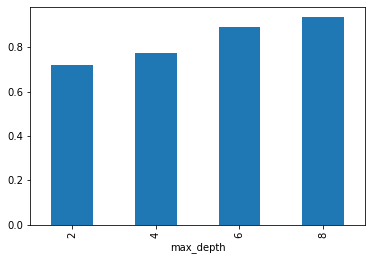

In [33]:
# Making inference about max_depth:
scores_df.groupby(by='max_depth')['scores'].mean().plot.bar();

## 4. Course completed!

1. Course completed!
> Thank you for sticking with me through these four chapters and congratulations on completing this course on model validation!

2. Course recap
> We covered topics such as evaluation metrics, creating training, validation, and testing datasets, cross-validation, and even touched on model tuning. You can use these techniques going forward to make sure your models perform as expected on new data.

3. Next steps
> There are so many directions that you can go from here. One of the best ways that you can solidify your model validation understanding would be to work through an older Kaggle competition. These are modeling competitions where several people post modeling code and techniques. Working through their examples would solidify all that you have learned here.

4. Next steps
> There are also plenty of other DataCamp courses you can check out. If you want a deeper dive into model tuning, check out our course on hyperparameter tuning. Or if you want to start using more complex models, beyond the random forests we used in this course, check out our course on deep learning.

5. Thank you!
> Again - Thank you for joining me and good luck in your future modeling efforts!